# Analysis of sample-target pairs

Although we are using embeddings, making this analysis very naive, we look at how our data has duplicates, and training features with multiple possible valid outputs. This effect may be a theoretical limit of the validation accuracy.

In [1]:
import random

import pickle

import numpy as np
from collections import Counter

Using TensorFlow backend.


In [29]:
pickle_file = "../processed_data/20200621-203342-5-4-5000"

with open(pickle_file, "rb") as f:
    X, y, tokenizer, len_vocab, ngram_len = pickle.load(f) 
    
print("Number of unique features", len(np.unique(X, axis=1)))
print("Number of unique targets", len(np.unique(y)))

Number of unique features 48986
Number of unique targets 4053


In [30]:
# get y in usable format then combine
y_rs = y.reshape(-1, 1)
Xy = np.concatenate((X, y_rs), axis=1)

In [31]:
# final column is y
Xy

array([[ 149,  200,    1,  322],
       [4859,    7,  334,    4],
       [   1,   84,  201,  138],
       ...,
       [ 142,  165,    7,  376],
       [ 123,    8,   43,  326],
       [  21,  546,    4,   29]], dtype=int32)

In [32]:
# Number of different sample pairs / features
num_samples = len(Xy)
num_unique_samples = len(np.unique(Xy, axis=0))
num_unique_features = len(np.unique(X, axis=0))


In [33]:
print("Numbers of samples (X and y): ", num_samples)
print("Number of unique X y pairs: ", num_unique_samples)
print("Number of unique X features: ", num_unique_features)

print("Percent non-unique Xy pairs (duplicates):", 100*(1 - (num_unique_samples/num_samples)))
print("Percent multiple possible outputs same features (of unique pairs): ",
      100*(num_unique_samples-num_unique_features)/num_unique_samples)

Numbers of samples (X and y):  48986
Number of unique X y pairs:  38965
Number of unique X features:  33833
Percent non-unique Xy pairs (duplicates): 20.456865226799493
Percent multiple possible outputs same features (of unique pairs):  13.170794302579237


Find the unique samples / features, and how many of them there are. Used for later counting.

In [34]:
# tuple (fixed size/memory) more efficient for later application
Xy_unique, Xy_index, Xy_counts = np.unique(Xy, return_counts=True, return_index=True, axis=0)
Xy_tp = list(map(tuple, Xy))
Xy_unique_tp = map(tuple, Xy_unique)
Xy_dict = dict(zip(Xy_unique_tp, Xy_counts))


In [35]:
X_unique, X_index, X_counts = np.unique(X, return_counts=True, return_index=True, axis=0)
X_tp = list(map(tuple, X))
X_unique_tp = map(tuple, X_unique)
X_dict = dict(zip(X_unique_tp, X_counts))
X_index

array([   54,    19,   387, ..., 36863, 20747, 10677])

For all the training samples find how many different targets each sample has.

Iterates through all feature samples and all samples (nested loops) therefore O(N^2). 

Take a subsample of the data to reduce run time (for large data). Appears to be representative with >1000 samples, but not statistically validated.

In [76]:
# could be converted to a comprehension
unique_out_per_training_sample = []
for index, training_sample in enumerate(random.sample(X_tp, 2000)):
    if (index + 1) % 200 == 0:
        print(index + 1)
    unique_targets = set()
    for each_full_sample in Xy_tp:
        if each_full_sample[:-1] == training_sample:
            unique_targets.add(each_full_sample[-1])
    unique_out_per_training_sample.append(len(unique_targets))


    

200
400
600
800
1000
1200
1400
1600
1800
2000


In [77]:
number_samples = len(unique_out_per_training_sample)
one_target = unique_out_per_training_sample.count(1)


In [78]:
one_target


1545

In [82]:
# How many samples of our data have only one possible valid output?
percent_samples_unique = one_target / number_samples

print(percent_samples_unique)

0.7725


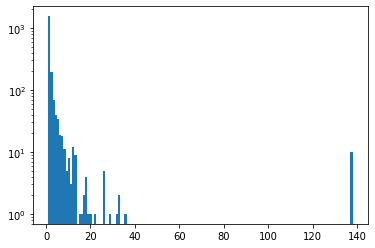

In [81]:
import matplotlib.pyplot as plt

plt.hist(unique_out_per_training_sample, bins=140);
plt.yscale("log");

#### 